# Beating the NBA Bookmakers Odds

In [45]:
import pandas as pd
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [46]:
import warnings
warnings.filterwarnings('ignore')

## Loading the Data and Preprocessing

In [47]:
boxscores = pd.read_csv("data/games.csv", index_col=0)

display(boxscores.head())
display(boxscores.tail())

,mp,mp.1,fg,fga,fg%,3p,3pa,3p%,ft,fta,...,tov%_max_opp,usg%_max_opp,ortg_max_opp,drtg_max_opp,team_opp,total_opp,home_opp,season,date,won
0,240.0,240.0,39.0,81.0,0.481,6.0,20.0,0.300,14.0,18.0,...,22.8,29.0,178.0,111.0,DAL,95,1,2016,2015-12-09,True
1,240.0,240.0,36.0,100.0,0.360,7.0,31.0,0.226,16.0,19.0,...,50.0,32.6,152.0,111.0,ATL,98,0,2016,2015-12-09,False
2,240.0,240.0,37.0,85.0,0.435,8.0,19.0,0.421,17.0,23.0,...,20.0,30.9,148.0,116.0,SAS,107,1,2018,2017-10-18,False
3,240.0,240.0,41.0,89.0,0.461,8.0,21.0,0.381,17.0,19.0,...,28.6,30.9,138.0,118.0,MIN,99,0,2018,2017-10-18,True
4,240.0,240.0,27.0,86.0,0.314,6.0,26.0,0.231,15.0,20.0,...,16.8,30.9,157.0,90.0,MEM,92,1,2021,2021-04-30,False


,mp,mp.1,fg,fga,fg%,3p,3pa,3p%,ft,fta,...,tov%_max_opp,usg%_max_opp,ortg_max_opp,drtg_max_opp,team_opp,total_opp,home_opp,season,date,won
17767,240.0,240.0,35.0,81.0,0.432,11.0,26.0,0.423,27.0,36.0,...,34.2,33.7,160.0,118.0,OKC,92,0,2019,2018-10-19,True
17768,240.0,240.0,37.0,74.0,0.500,13.0,25.0,0.520,26.0,37.0,...,25.0,30.0,139.0,129.0,ORL,108,1,2017,2016-12-14,True
17769,240.0,240.0,42.0,89.0,0.472,14.0,33.0,0.424,10.0,20.0,...,25.6,29.9,175.0,126.0,LAC,113,0,2017,2016-12-14,False
17770,240.0,240.0,41.0,85.0,0.482,9.0,26.0,0.346,26.0,30.0,...,27.7,27.1,150.0,126.0,MIA,106,1,2020,2020-09-19,True
17771,240.0,240.0,33.0,85.0,0.388,12.0,44.0,0.273,28.0,34.0,...,51.5,36.2,141.0,114.0,BOS,117,0,2020,2020-09-19,False


In [48]:
boxscore = boxscores.sort_values("date")
boxscores = boxscores.reset_index(drop=True)
del boxscores["mp.1"]
del boxscores["mp_opp.1"]
del boxscores["index_opp"]

In [49]:
display(boxscores.head())
display(boxscores.tail())

,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,...,tov%_max_opp,usg%_max_opp,ortg_max_opp,drtg_max_opp,team_opp,total_opp,home_opp,season,date,won
0,240.0,39.0,81.0,0.481,6.0,20.0,0.300,14.0,18.0,0.778,...,22.8,29.0,178.0,111.0,DAL,95,1,2016,2015-12-09,True
1,240.0,36.0,100.0,0.360,7.0,31.0,0.226,16.0,19.0,0.842,...,50.0,32.6,152.0,111.0,ATL,98,0,2016,2015-12-09,False
2,240.0,37.0,85.0,0.435,8.0,19.0,0.421,17.0,23.0,0.739,...,20.0,30.9,148.0,116.0,SAS,107,1,2018,2017-10-18,False
3,240.0,41.0,89.0,0.461,8.0,21.0,0.381,17.0,19.0,0.895,...,28.6,30.9,138.0,118.0,MIN,99,0,2018,2017-10-18,True
4,240.0,27.0,86.0,0.314,6.0,26.0,0.231,15.0,20.0,0.750,...,16.8,30.9,157.0,90.0,MEM,92,1,2021,2021-04-30,False


,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,...,tov%_max_opp,usg%_max_opp,ortg_max_opp,drtg_max_opp,team_opp,total_opp,home_opp,season,date,won
17767,240.0,35.0,81.0,0.432,11.0,26.0,0.423,27.0,36.0,0.750,...,34.2,33.7,160.0,118.0,OKC,92,0,2019,2018-10-19,True
17768,240.0,37.0,74.0,0.500,13.0,25.0,0.520,26.0,37.0,0.703,...,25.0,30.0,139.0,129.0,ORL,108,1,2017,2016-12-14,True
17769,240.0,42.0,89.0,0.472,14.0,33.0,0.424,10.0,20.0,0.500,...,25.6,29.9,175.0,126.0,LAC,113,0,2017,2016-12-14,False
17770,240.0,41.0,85.0,0.482,9.0,26.0,0.346,26.0,30.0,0.867,...,27.7,27.1,150.0,126.0,MIA,106,1,2020,2020-09-19,True
17771,240.0,33.0,85.0,0.388,12.0,44.0,0.273,28.0,34.0,0.824,...,51.5,36.2,141.0,114.0,BOS,117,0,2020,2020-09-19,False


In [50]:
# Creating the Target Variable to Preiict the Winner of the Game
def add_target(group):
    group["target"] = group["won"].shift(-1)
    return group

boxscores = boxscores.groupby("team", group_keys=False).apply(add_target)

boxscores 

,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,...,usg%_max_opp,ortg_max_opp,drtg_max_opp,team_opp,total_opp,home_opp,season,date,won,target
0,240.0,39.0,81.0,0.481,6.0,20.0,0.300,14.0,18.0,0.778,...,29.0,178.0,111.0,DAL,95,1,2016,2015-12-09,True,True
1,240.0,36.0,100.0,0.360,7.0,31.0,0.226,16.0,19.0,0.842,...,32.6,152.0,111.0,ATL,98,0,2016,2015-12-09,False,False
2,240.0,37.0,85.0,0.435,8.0,19.0,0.421,17.0,23.0,0.739,...,30.9,148.0,116.0,SAS,107,1,2018,2017-10-18,False,True
3,240.0,41.0,89.0,0.461,8.0,21.0,0.381,17.0,19.0,0.895,...,30.9,138.0,118.0,MIN,99,0,2018,2017-10-18,True,False
4,240.0,27.0,86.0,0.314,6.0,26.0,0.231,15.0,20.0,0.750,...,30.9,157.0,90.0,MEM,92,1,2021,2021-04-30,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17767,240.0,35.0,81.0,0.432,11.0,26.0,0.423,27.0,36.0,0.750,...,33.7,160.0,118.0,OKC,92,0,2019,2018-10-19,True,True
17768,240.0,37.0,74.0,0.500,13.0,25.0,0.520,26.0,37.0,0.703,...,30.0,139.0,129.0,ORL,108,1,2017,2016-12-14,True,NaN
17769,240.0,42.0,89.0,0.472,14.0,33.0,0.424,10.0,20.0,0.500,...,29.9,175.0,126.0,LAC,113,0,2017,2016-12-14,False,NaN
17770,240.0,41.0,85.0,0.482,9.0,26.0,0.346,26.0,30.0,0.867,...,27.1,150.0,126.0,MIA,106,1,2020,2020-09-19,True,NaN


In [51]:
display(boxscores[boxscores["team"] == "NYK"].head)
display(boxscores[boxscores["team"] == "LAL"].head)
display(boxscores[boxscores["team"] == "BOS"].head)


<bound method NDFrame.head of           mp    fg   fga    fg%    3p   3pa    3p%    ft   fta    ft%  ...  \
114    240.0  36.0  86.0  0.419   3.0  18.0  0.167  16.0  20.0  0.800  ...   
121    240.0  41.0  88.0  0.466   3.0  18.0  0.167  25.0  26.0  0.962  ...   
206    240.0  39.0  91.0  0.429   8.0  28.0  0.286  22.0  32.0  0.688  ...   
220    240.0  39.0  87.0  0.448  12.0  29.0  0.414  10.0  12.0  0.833  ...   
228    240.0  36.0  82.0  0.439  13.0  30.0  0.433   7.0  11.0  0.636  ...   
...      ...   ...   ...    ...   ...   ...    ...   ...   ...    ...  ...   
17636  240.0  36.0  88.0  0.409   5.0  22.0  0.227  18.0  20.0  0.900  ...   
17639  240.0  40.0  82.0  0.488  13.0  32.0  0.406  18.0  24.0  0.750  ...   
17701  240.0  40.0  88.0  0.455   7.0  21.0  0.333  19.0  24.0  0.792  ...   
17745  240.0  37.0  82.0  0.451   9.0  28.0  0.321  14.0  15.0  0.933  ...   
17765  240.0  35.0  97.0  0.361   8.0  29.0  0.276  17.0  21.0  0.810  ...   

       usg%_max_opp  ortg_max_opp

<bound method NDFrame.head of           mp    fg   fga    fg%    3p   3pa    3p%    ft   fta    ft%  ...  \
37     240.0  34.0  82.0  0.415  11.0  40.0  0.275  17.0  23.0  0.739  ...   
44     240.0  39.0  78.0  0.500  10.0  30.0  0.333  28.0  43.0  0.651  ...   
55     240.0  32.0  90.0  0.356   4.0  19.0  0.211  13.0  17.0  0.765  ...   
58     240.0  43.0  91.0  0.473   8.0  26.0  0.308  16.0  23.0  0.696  ...   
74     240.0  43.0  90.0  0.478  10.0  30.0  0.333  14.0  17.0  0.824  ...   
...      ...   ...   ...    ...   ...   ...    ...   ...   ...    ...  ...   
17547  240.0  31.0  86.0  0.360   6.0  23.0  0.261  22.0  26.0  0.846  ...   
17585  240.0  43.0  86.0  0.500  14.0  29.0  0.483  23.0  28.0  0.821  ...   
17586  240.0  36.0  82.0  0.439   7.0  23.0  0.304  17.0  23.0  0.739  ...   
17592  240.0  31.0  83.0  0.373   3.0  21.0  0.143  12.0  16.0  0.750  ...   
17615  240.0  47.0  85.0  0.553  19.0  41.0  0.463  26.0  30.0  0.867  ...   

       usg%_max_opp  ortg_max_opp

<bound method NDFrame.head of           mp    fg   fga    fg%    3p   3pa    3p%    ft   fta    ft%  ...  \
43     240.0  42.0  91.0  0.462  17.0  42.0  0.405  17.0  25.0  0.680  ...   
135    240.0  42.0  86.0  0.488  16.0  32.0  0.500  17.0  23.0  0.739  ...   
141    240.0  45.0  83.0  0.542  12.0  33.0  0.364  26.0  28.0  0.929  ...   
176    240.0  30.0  81.0  0.370   7.0  25.0  0.280  26.0  36.0  0.722  ...   
181    240.0  42.0  89.0  0.472  12.0  31.0  0.387  12.0  14.0  0.857  ...   
...      ...   ...   ...    ...   ...   ...    ...   ...   ...    ...  ...   
17662  240.0  36.0  89.0  0.404  12.0  34.0  0.353  15.0  17.0  0.882  ...   
17677  240.0  39.0  93.0  0.419  12.0  39.0  0.308  15.0  19.0  0.789  ...   
17690  240.0  28.0  88.0  0.318   5.0  28.0  0.179  11.0  12.0  0.917  ...   
17734  265.0  39.0  97.0  0.402  14.0  37.0  0.378  24.0  31.0  0.774  ...   
17770  240.0  41.0  85.0  0.482   9.0  26.0  0.346  26.0  30.0  0.867  ...   

       usg%_max_opp  ortg_max_opp

In [52]:
boxscores = boxscores.dropna(subset=["target"])
boxscores["target"] = boxscores["target"].astype(int, errors="ignore")

In [53]:
display(boxscores["won"].value_counts())
display(boxscores["target"].value_counts())

won
True     8872
False    8870
Name: count, dtype: int64

target
1    8873
0    8869
Name: count, dtype: int64

In [54]:
# Determine the columns that can be trained on
# We will ignore the columns that are not available at the start of the game (that are null)

nulls = pd.isnull(boxscores).sum()
nulls = nulls[nulls > 0]
non_null_columns = boxscores.columns[~boxscores.columns.isin(nulls.index)]

non_null_columns


Index(['mp', 'fg', 'fga', 'fg%', '3p', '3pa', '3p%', 'ft', 'fta', 'ft%',
       ...
       'usg%_max_opp', 'ortg_max_opp', 'drtg_max_opp', 'team_opp', 'total_opp',
       'home_opp', 'season', 'date', 'won', 'target'],
      dtype='object', length=142)

In [55]:
boxscores = boxscores[non_null_columns].copy()
display(boxscores.head())
display(boxscores.tail())

,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,...,usg%_max_opp,ortg_max_opp,drtg_max_opp,team_opp,total_opp,home_opp,season,date,won,target
0,240.0,39.0,81.0,0.481,6.0,20.0,0.300,14.0,18.0,0.778,...,29.0,178.0,111.0,DAL,95,1,2016,2015-12-09,True,1
1,240.0,36.0,100.0,0.360,7.0,31.0,0.226,16.0,19.0,0.842,...,32.6,152.0,111.0,ATL,98,0,2016,2015-12-09,False,0
2,240.0,37.0,85.0,0.435,8.0,19.0,0.421,17.0,23.0,0.739,...,30.9,148.0,116.0,SAS,107,1,2018,2017-10-18,False,1
3,240.0,41.0,89.0,0.461,8.0,21.0,0.381,17.0,19.0,0.895,...,30.9,138.0,118.0,MIN,99,0,2018,2017-10-18,True,0
4,240.0,27.0,86.0,0.314,6.0,26.0,0.231,15.0,20.0,0.750,...,30.9,157.0,90.0,MEM,92,1,2021,2021-04-30,False,1


,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,...,usg%_max_opp,ortg_max_opp,drtg_max_opp,team_opp,total_opp,home_opp,season,date,won,target
17750,265.0,42.0,97.0,0.433,8.0,29.0,0.276,21.0,31.0,0.677,...,28.6,121.0,109.0,PHO,107,1,2018,2017-11-22,True,1
17751,265.0,37.0,93.0,0.398,7.0,22.0,0.318,26.0,33.0,0.788,...,36.6,133.0,112.0,MIL,113,0,2018,2017-11-22,False,1
17754,240.0,39.0,77.0,0.506,9.0,22.0,0.409,25.0,27.0,0.926,...,30.9,175.0,126.0,BRK,103,1,2017,2017-02-13,True,0
17760,240.0,44.0,80.0,0.550,14.0,35.0,0.400,17.0,18.0,0.944,...,31.0,124.0,126.0,MEM,99,1,2021,2021-02-26,True,1
17767,240.0,35.0,81.0,0.432,11.0,26.0,0.423,27.0,36.0,0.750,...,33.7,160.0,118.0,OKC,92,0,2019,2018-10-19,True,1


In [56]:
# Min-Max Scaler:
# We will use the Min-Max Scaler to all statistical features in the dataset to get them wihtin a range of 0 to 1
# We do this to normalize and reduces the variance of the data while preserving the relationships between the different 
# features as well as the relative order, distribution, and distnace of the datapoints

scaler = MinMaxScaler()

non_stat_columns = ["season", "date", "won", "target", "team", "team_opp"]
stat_columns = boxscores.columns[~boxscores.columns.isin(non_stat_columns)]

boxscores[stat_columns] = scaler.fit_transform(boxscores[stat_columns])

display(boxscores.head())
display(boxscores.tail())

,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,...,usg%_max_opp,ortg_max_opp,drtg_max_opp,team_opp,total_opp,home_opp,season,date,won,target
0,0.0,0.454545,0.308824,0.507177,0.206897,0.242424,0.356295,0.302326,0.269841,0.740957,...,0.088575,0.421801,0.400000,DAL,0.326316,1.0,2016,2015-12-09,True,1
1,0.0,0.386364,0.588235,0.217703,0.241379,0.409091,0.268409,0.348837,0.285714,0.815636,...,0.134788,0.298578,0.400000,ATL,0.357895,0.0,2016,2015-12-09,False,0
2,0.0,0.409091,0.367647,0.397129,0.275862,0.227273,0.500000,0.372093,0.349206,0.695449,...,0.112965,0.279621,0.458824,SAS,0.452632,1.0,2018,2017-10-18,False,1
3,0.0,0.500000,0.426471,0.459330,0.275862,0.257576,0.452494,0.372093,0.285714,0.877480,...,0.112965,0.232227,0.482353,MIN,0.368421,0.0,2018,2017-10-18,True,0
4,0.0,0.181818,0.382353,0.107656,0.206897,0.333333,0.274347,0.325581,0.301587,0.708285,...,0.112965,0.322275,0.152941,MEM,0.294737,1.0,2021,2021-04-30,False,1


,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,...,usg%_max_opp,ortg_max_opp,drtg_max_opp,team_opp,total_opp,home_opp,season,date,won,target
17750,0.25,0.522727,0.544118,0.392344,0.275862,0.378788,0.327791,0.465116,0.476190,0.623104,...,0.083440,0.151659,0.376471,PHO,0.452632,1.0,2018,2017-11-22,True,1
17751,0.25,0.409091,0.485294,0.308612,0.241379,0.272727,0.377672,0.581395,0.507937,0.752625,...,0.186136,0.208531,0.411765,MIL,0.515789,0.0,2018,2017-11-22,False,1
17754,0.00,0.454545,0.250000,0.566986,0.310345,0.272727,0.485748,0.558140,0.412698,0.913652,...,0.112965,0.407583,0.576471,BRK,0.410526,1.0,2017,2017-02-13,True,0
17760,0.00,0.568182,0.294118,0.672249,0.482759,0.469697,0.475059,0.372093,0.269841,0.934656,...,0.114249,0.165877,0.576471,MEM,0.368421,1.0,2021,2021-02-26,True,1
17767,0.00,0.363636,0.308824,0.389952,0.379310,0.333333,0.502375,0.604651,0.555556,0.708285,...,0.148909,0.336493,0.482353,OKC,0.294737,0.0,2019,2018-10-19,True,1


In [57]:
boxscores.groupby(["home"]).apply(lambda x: x[x["won"] == 1].shape[0] / x.shape[0])

home
0.0    0.428137
1.0    0.571976
dtype: float64

In [58]:
# In our model we will be training on data based on an n-game lookback window (rolling average)
# Our objective in doing so is to better model and take into account the team's recent form and performance 
# when predicting the outcome of a game

# We will create a function that will create a rolling average of the data for each team for each game
bs_rolling = boxscores[list(stat_columns) + ["won", "team", "season"]]

def team_averages(group):
    group[stat_columns] = group[stat_columns].rolling(10).mean()
    return group

# We will then apply this function to each team in the dataset
bs_rolling = bs_rolling.groupby(["team", "season"], group_keys=False).apply(team_averages)


In [59]:
bs_rolling

,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,...,blk%_max_opp,tov%_max_opp,usg%_max_opp,ortg_max_opp,drtg_max_opp,total_opp,home_opp,won,team,season
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,ATL,2016
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,DAL,2016
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,MIN,2018
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,SAS,2018
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,ORL,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17750,0.050,0.445455,0.344118,0.462440,0.244828,0.319697,0.337530,0.400000,0.357143,0.754142,...,0.0822,0.443187,0.116560,0.382464,0.390588,0.414737,0.5,True,MIL,2018
17751,0.025,0.518182,0.426471,0.488995,0.375862,0.368182,0.457720,0.390698,0.365079,0.705718,...,0.0884,0.319392,0.164313,0.413744,0.488235,0.540000,0.4,False,PHO,2018
17754,0.025,0.375000,0.339706,0.383493,0.293103,0.346970,0.365914,0.420930,0.353968,0.785298,...,0.0682,0.375996,0.134403,0.417062,0.440000,0.370526,0.7,True,MEM,2017
17760,0.000,0.529545,0.408824,0.518182,0.475862,0.443939,0.496556,0.390698,0.325397,0.812252,...,0.0774,0.274004,0.168293,0.374408,0.600000,0.447368,0.6,True,LAC,2021


In [60]:
bs_rolling.columns

Index(['mp', 'fg', 'fga', 'fg%', '3p', '3pa', '3p%', 'ft', 'fta', 'ft%',
       ...
       'blk%_max_opp', 'tov%_max_opp', 'usg%_max_opp', 'ortg_max_opp',
       'drtg_max_opp', 'total_opp', 'home_opp', 'won', 'team', 'season'],
      dtype='object', length=139)

In [61]:
rolling_cols = [f"{col}_10" for col in bs_rolling.columns]
bs_rolling.columns = rolling_cols
boxscores = pd.concat([boxscores, bs_rolling], axis=1)

boxscores = boxscores.dropna()
boxscores = boxscores.reset_index(drop=True)

boxscores

,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,...,blk%_max_opp_10,tov%_max_opp_10,usg%_max_opp_10,ortg_max_opp_10,drtg_max_opp_10,total_opp_10,home_opp_10,won_10,team_10,season_10
0,0.00,0.431818,0.264706,0.521531,0.275862,0.272727,0.432304,0.325581,0.301587,0.708285,...,0.0735,0.389937,0.243261,0.434123,0.485882,0.411579,0.6,True,MIL,2018
1,0.00,0.272727,0.235294,0.332536,0.275862,0.363636,0.339667,0.372093,0.349206,0.695449,...,0.0535,0.294444,0.165854,0.337441,0.468235,0.392632,0.5,False,SAS,2018
2,0.00,0.681818,0.529412,0.576555,0.206897,0.333333,0.274347,0.279070,0.206349,0.917153,...,0.0527,0.299790,0.160847,0.342180,0.490588,0.394737,0.5,True,SAS,2018
3,0.00,0.568182,0.544118,0.442584,0.724138,0.606061,0.566508,0.209302,0.174603,0.805134,...,0.0639,0.400105,0.175225,0.462085,0.560000,0.369474,0.6,False,MIA,2022
4,0.00,0.477273,0.455882,0.409091,0.517241,0.590909,0.414489,0.255814,0.222222,0.766628,...,0.1438,0.320335,0.151091,0.432701,0.512941,0.407368,0.7,True,GSW,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15847,0.25,0.522727,0.544118,0.392344,0.275862,0.378788,0.327791,0.465116,0.476190,0.623104,...,0.0822,0.443187,0.116560,0.382464,0.390588,0.414737,0.5,True,MIL,2018
15848,0.25,0.409091,0.485294,0.308612,0.241379,0.272727,0.377672,0.581395,0.507937,0.752625,...,0.0884,0.319392,0.164313,0.413744,0.488235,0.540000,0.4,False,PHO,2018
15849,0.00,0.454545,0.250000,0.566986,0.310345,0.272727,0.485748,0.558140,0.412698,0.913652,...,0.0682,0.375996,0.134403,0.417062,0.440000,0.370526,0.7,True,MEM,2017
15850,0.00,0.568182,0.294118,0.672249,0.482759,0.469697,0.475059,0.372093,0.269841,0.934656,...,0.0774,0.274004,0.168293,0.374408,0.600000,0.447368,0.6,True,LAC,2021


In [62]:
# We are now shifting columns to determine the next opponent and game date for each team per instance

def shift_col(team, col_name):
    next_col = team[col_name].shift(-1)
    return next_col

def add_col(df, col_name):
    return df.groupby("team", group_keys=False).apply(lambda x: shift_col(x, col_name))

boxscores["home_next"] = add_col(boxscores, "home")
boxscores["team_opp_next"] = add_col(boxscores, "team_opp")
boxscores["date_next"] = add_col(boxscores, "date")

boxscores

,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,...,ortg_max_opp_10,drtg_max_opp_10,total_opp_10,home_opp_10,won_10,team_10,season_10,home_next,team_opp_next,date_next
0,0.00,0.431818,0.264706,0.521531,0.275862,0.272727,0.432304,0.325581,0.301587,0.708285,...,0.434123,0.485882,0.411579,0.6,True,MIL,2018,1.0,IND,2018-01-03
1,0.00,0.272727,0.235294,0.332536,0.275862,0.363636,0.339667,0.372093,0.349206,0.695449,...,0.337441,0.468235,0.392632,0.5,False,SAS,2018,1.0,MIN,2018-03-17
2,0.00,0.681818,0.529412,0.576555,0.206897,0.333333,0.274347,0.279070,0.206349,0.917153,...,0.342180,0.490588,0.394737,0.5,True,SAS,2018,0.0,NYK,2021-05-13
3,0.00,0.568182,0.544118,0.442584,0.724138,0.606061,0.566508,0.209302,0.174603,0.805134,...,0.462085,0.560000,0.369474,0.6,False,MIA,2022,1.0,ATL,2022-04-19
4,0.00,0.477273,0.455882,0.409091,0.517241,0.590909,0.414489,0.255814,0.222222,0.766628,...,0.432701,0.512941,0.407368,0.7,True,GSW,2022,1.0,HOU,2016-04-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15847,0.25,0.522727,0.544118,0.392344,0.275862,0.378788,0.327791,0.465116,0.476190,0.623104,...,0.382464,0.390588,0.414737,0.5,True,MIL,2018,NaN,None,None
15848,0.25,0.409091,0.485294,0.308612,0.241379,0.272727,0.377672,0.581395,0.507937,0.752625,...,0.413744,0.488235,0.540000,0.4,False,PHO,2018,NaN,None,None
15849,0.00,0.454545,0.250000,0.566986,0.310345,0.272727,0.485748,0.558140,0.412698,0.913652,...,0.417062,0.440000,0.370526,0.7,True,MEM,2017,NaN,None,None
15850,0.00,0.568182,0.294118,0.672249,0.482759,0.469697,0.475059,0.372093,0.269841,0.934656,...,0.374408,0.600000,0.447368,0.6,True,LAC,2021,1.0,OKC,2018-10-19


In [63]:
# We are creating a matchup dataframe by merging the home and opponenet team data for each game

matchup = boxscores.merge(boxscores[rolling_cols + ["team_opp_next", "date_next", "team"]], 
                          left_on=["team", "date_next"], right_on=["team_opp_next", "date_next"])

matchup

,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,...,usg%_max_opp_10_y,ortg_max_opp_10_y,drtg_max_opp_10_y,total_opp_10_y,home_opp_10_y,won_10_y,team_10_y,season_10_y,team_opp_next_y,team_y
0,0.00,0.477273,0.426471,0.430622,0.379310,0.409091,0.421615,0.069767,0.079365,0.611435,...,0.176380,0.632701,0.523529,0.397895,0.4,False,DET,2016,IND,DET
1,0.00,0.272727,0.308824,0.272727,0.448276,0.439394,0.467933,0.302326,0.365079,0.513419,...,0.149294,0.457820,0.425882,0.421053,0.5,False,IND,2018,DET,IND
2,0.00,0.545455,0.338235,0.595694,0.413793,0.348485,0.527316,0.348837,0.380952,0.579930,...,0.121566,0.390521,0.441176,0.417895,0.5,False,MIL,2018,DET,MIL
3,0.00,0.409091,0.308824,0.449761,0.482759,0.530303,0.426366,0.372093,0.333333,0.735123,...,0.170218,0.408531,0.502353,0.373684,0.8,True,GSW,2022,DAL,GSW
4,0.00,0.477273,0.558824,0.332536,0.379310,0.500000,0.352732,0.093023,0.095238,0.666278,...,0.138126,0.366825,0.371765,0.410526,0.7,True,BRK,2016,PHI,BRK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15491,0.00,0.431818,0.426471,0.377990,0.551724,0.500000,0.513064,0.232558,0.190476,0.820303,...,0.204750,0.427014,0.435294,0.484211,0.5,False,OKC,2017,DEN,OKC
15492,0.25,0.500000,0.485294,0.411483,0.379310,0.469697,0.372922,0.348837,0.285714,0.815636,...,0.113992,0.358768,0.388235,0.402105,0.3,False,MIL,2017,PHO,MIL
15493,0.00,0.568182,0.455882,0.514354,0.275862,0.348485,0.351544,0.441860,0.365079,0.805134,...,0.171245,0.519905,0.507059,0.484211,0.3,True,CHI,2021,MIL,CHI
15494,0.00,0.545455,0.485294,0.461722,0.103448,0.136364,0.274347,0.372093,0.428571,0.541424,...,0.125674,0.403791,0.498824,0.428421,0.9,False,TOR,2022,MIL,TOR


In [64]:
matchup[["team_x", "team_opp_next_x", "team_y", "team_opp_next_y", "date_next"]]

,team_x,team_opp_next_x,team_y,team_opp_next_y,date_next
0,IND,DET,DET,IND,2017-11-08
1,DET,IND,IND,DET,2017-11-08
2,DET,MIL,MIL,DET,2017-12-06
3,DAL,GSW,GSW,DAL,2022-01-05
4,PHI,BRK,BRK,PHI,2016-03-15
...,...,...,...,...,...
15491,DEN,OKC,OKC,DEN,2017-11-09
15492,PHO,MIL,MIL,PHO,2017-11-22
15493,MIL,CHI,CHI,MIL,2016-01-12
15494,MIL,TOR,TOR,MIL,2017-04-27


In [65]:
non_stat_columns = list(matchup.columns[matchup.dtypes == "object"]) + non_stat_columns

non_stat_columns

['team_x',
 'team_opp',
 'date',
 'team_10_x',
 'team_opp_next_x',
 'date_next',
 'team_10_y',
 'team_opp_next_y',
 'team_y',
 'season',
 'date',
 'won',
 'target',
 'team',
 'team_opp']

In [66]:
# We are now splitting our matchup data into the training and target matrices
# We will be removing the non-statistical columns from the training matrix and using this as X
# We will be using the target column as y

X_columns = matchup.columns[~matchup.columns.isin(non_stat_columns)]
X = matchup[X_columns]
y = matchup["target"]

In [67]:
X

,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,...,stl%_max_opp_10_y,blk%_max_opp_10_y,tov%_max_opp_10_y,usg%_max_opp_10_y,ortg_max_opp_10_y,drtg_max_opp_10_y,total_opp_10_y,home_opp_10_y,won_10_y,season_10_y
0,0.00,0.477273,0.426471,0.430622,0.379310,0.409091,0.421615,0.069767,0.079365,0.611435,...,0.0658,0.0801,0.314256,0.176380,0.632701,0.523529,0.397895,0.4,False,2016
1,0.00,0.272727,0.308824,0.272727,0.448276,0.439394,0.467933,0.302326,0.365079,0.513419,...,0.0591,0.1264,0.406709,0.149294,0.457820,0.425882,0.421053,0.5,False,2018
2,0.00,0.545455,0.338235,0.595694,0.413793,0.348485,0.527316,0.348837,0.380952,0.579930,...,0.0435,0.0727,0.331237,0.121566,0.390521,0.441176,0.417895,0.5,False,2018
3,0.00,0.409091,0.308824,0.449761,0.482759,0.530303,0.426366,0.372093,0.333333,0.735123,...,0.0510,0.0871,0.246436,0.170218,0.408531,0.502353,0.373684,0.8,True,2022
4,0.00,0.477273,0.558824,0.332536,0.379310,0.500000,0.352732,0.093023,0.095238,0.666278,...,0.0828,0.0943,0.353145,0.138126,0.366825,0.371765,0.410526,0.7,True,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15491,0.00,0.431818,0.426471,0.377990,0.551724,0.500000,0.513064,0.232558,0.190476,0.820303,...,0.0740,0.0888,0.412264,0.204750,0.427014,0.435294,0.484211,0.5,False,2017
15492,0.25,0.500000,0.485294,0.411483,0.379310,0.469697,0.372922,0.348837,0.285714,0.815636,...,0.0495,0.0805,0.375052,0.113992,0.358768,0.388235,0.402105,0.3,False,2017
15493,0.00,0.568182,0.455882,0.514354,0.275862,0.348485,0.351544,0.441860,0.365079,0.805134,...,0.0672,0.1178,0.281551,0.171245,0.519905,0.507059,0.484211,0.3,True,2021
15494,0.00,0.545455,0.485294,0.461722,0.103448,0.136364,0.274347,0.372093,0.428571,0.541424,...,0.0491,0.0915,0.329140,0.125674,0.403791,0.498824,0.428421,0.9,False,2022


In [68]:
y

0        1
1        1
2        1
3        0
4        0
        ..
15491    1
15492    0
15493    1
15494    0
15495    1
Name: target, Length: 15496, dtype: int32

In [69]:
y.value_counts()

target
1    7751
0    7745
Name: count, dtype: int64

In [70]:
from sklearn.model_selection import train_test_split

# X['won_10_y'] = X['won_10_y'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape


((12396, 413), (12396,))

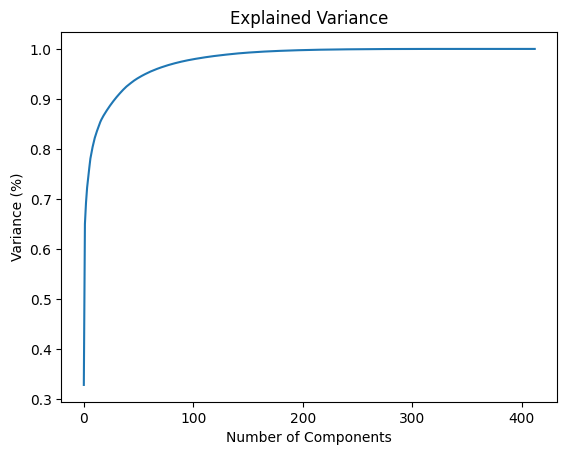

In [71]:
## create list of features
#Fitting the PCA algorithm with our Data
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


pca = PCA().fit(X_train)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [72]:
# X_train = PCA(40).fit_transform(X_train)

## Building the LSTM Model

In [73]:
import torch
import torch.nn as nn
import torch.optim as optim


In [74]:
import torch.nn.functional as F

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-torch.log(torch.tensor(10000.0)) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(0), :]
        return x

class TransformerClassifier(nn.Module):
    def __init__(self, num_features, num_classes, dim_model=64, num_heads=4, num_layers=3, dropout=0.1):
        super(TransformerClassifier, self).__init__()
        self.linear_in = nn.Linear(num_features, dim_model)
        self.pos_encoder = PositionalEncoding(dim_model)
        encoder_layers = nn.TransformerEncoderLayer(d_model=dim_model, nhead=num_heads, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_layers=num_layers)
        self.linear_out = nn.Linear(dim_model, num_classes)

    def forward(self, x):
        x = self.linear_in(x)
        x = self.pos_encoder(x)
        x = self.transformer_encoder(x)
        x = x.mean(dim=1)
        x = self.linear_out(x)
        return x




In [88]:
class LSTMClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, device):
        super(LSTMClassifier, self).__init__()
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim
        self.lstm = nn.LSTM(input_dim, hidden_dim, layer_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.device = device

    def forward(self, x):
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_().to(self.device)
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_().to(self.device)
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :]) 

        return out


In [89]:
input_dim = 413    # Number of input features
hidden_dim = 100   # Example value, you might need to experiment with this
layer_dim = 2      # Example value, can be 1, 2, or more
output_dim = 2     # For binary classification




In [90]:
import numpy as np


X_train = np.array(X_train.values, dtype = np.float32)
y_train = np.array(y_train.values, dtype = np.float32)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [97]:
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import precision_score, recall_score, f1_score
from torch.optim.lr_scheduler import StepLR



X_tensor = torch.tensor(X_train)
print(X_tensor.dtype)
y_tensor = torch.tensor(y_train)
# Create DataLoader for batch processing
batch_size = 32
dataset = TensorDataset(X_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


# Check for GPU availability and set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Instantiate the model and move it to the device (GPU or CPU)
# model = LSTMClassifier(input_dim, hidden_dim, layer_dim, output_dim, device).to(device)
model = TransformerClassifier(num_features=input_dim, num_classes=2, dim_model=128, num_heads=8, num_layers=4, dropout=0.2).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
scheduler = StepLR(optimizer, step_size=10, gamma=0.1)


num_epochs=25

# Function to calculate accuracy
def calculate_accuracy(y_true, y_pred):
    predicted = torch.argmax(y_pred, dim=1)
    correct = (predicted == y_true).float().sum()
    return correct / y_true.shape[0]

# Training loop
num_epochs = 10
best_accuracy = 0.0

for epoch in range(num_epochs):
    total_loss = 0
    total_accuracy = 0
    all_predictions = []
    all_targets = []
    for batch, (inputs, targets) in enumerate(dataloader):
        # Move data to device
        inputs, targets = inputs.unsqueeze(1).to(device).float(), targets.to(device).long()

        #inputs.shape should be [32, 1, 413]

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        scheduler.step()


        # Calculate batch loss and accuracy
        total_loss += loss.item()
        accuracy = calculate_accuracy(targets, outputs)
        total_accuracy += accuracy.item()

        # Collect predictions and true labels
        _, predicted = torch.max(outputs.data, 1)
        all_predictions.extend(predicted.cpu().numpy())
        all_targets.extend(targets.cpu().numpy())

    # Calculate metrics
    average_loss = total_loss / len(dataloader)
    average_accuracy = total_accuracy / len(dataloader)
    precision = precision_score(all_targets, all_predictions)
    recall = recall_score(all_targets, all_predictions)
    f1 = f1_score(all_targets, all_predictions)

    # Print metrics
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {average_loss:.4f}, Accuracy: {average_accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

    # Save the model if it has the best accuracy so far
    if average_accuracy > best_accuracy:
        best_accuracy = average_accuracy
        torch.save(model.state_dict(), 'best_lstm_classifier.pth')
        print(f"Saved model with accuracy: {best_accuracy:.4f}")

# Save the model after training
torch.save(model.state_dict(), 'lstm_classifier.pth')

torch.float32
Using device: cuda
Epoch 1/10, Loss: 0.7208, Accuracy: 0.4996, Precision: 0.5208, Recall: 0.0681, F1 Score: 0.1205
Saved model with accuracy: 0.4996
Epoch 2/10, Loss: 0.7087, Accuracy: 0.4968, Precision: 0.4991, Recall: 0.0444, F1 Score: 0.0816
Epoch 3/10, Loss: 0.7084, Accuracy: 0.4946, Precision: 0.4740, Recall: 0.0394, F1 Score: 0.0728
Epoch 4/10, Loss: 0.7092, Accuracy: 0.4992, Precision: 0.5264, Recall: 0.0447, F1 Score: 0.0825


KeyboardInterrupt: 

In [92]:
from sklearn.metrics import classification_report

# Convert your test data to a type that TensorFlow supports
X_test = torch.tensor(np.array(X_test, dtype = np.float32))
y_test = torch.tensor(np.array(y_test, dtype = np.float32))
print(X_test.shape, y_test.shape)

test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    
    inputs, targets = X_test.unsqueeze(1).to(device).float(), y_test.to(device).long()
    outputs = model(inputs)
    _, predicted = torch.max(outputs.data, 1)
    total += y_test.size(0)
    correct += (predicted == targets).sum().item()


accuracy = accuracy_score(y_test, np.array(predicted.cpu()))
print("Accuracy:", accuracy)

print(classification_report(y_test, np.array(predicted.cpu())))



torch.Size([3100, 413]) torch.Size([3100])
Accuracy: 0.48838709677419356
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1586
         1.0       0.49      1.00      0.66      1514

    accuracy                           0.49      3100
   macro avg       0.24      0.50      0.33      3100
weighted avg       0.24      0.49      0.32      3100



# Load in and Simulate Model with Betting Odds

In [ ]:
boxscores = pd.read_csv("games_2023_sorted.csv", index_col=0)
# games_1023.dropna(subset=[games_1023.columns[0]], inplace=True)
boxscores 

,mp.1,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,...,tov%_max_opp,usg%_max_opp,ortg_max_opp,drtg_max_opp,team_opp,total_opp,home_opp,season,date,won
0.0,240.0,41.0,90.0,0.456,10.0,29.0,0.345,15.0,20.0,0.750,...,25.0,62.4,200.0,123.0,DEN,119.0,1.0,2024.0,10/24/23,False
1.0,240.0,42.0,95.0,0.442,11.0,33.0,0.333,13.0,17.0,0.765,...,23.7,31.5,225.0,118.0,GSW,104.0,1.0,2024.0,10/24/23,True
4.0,240.0,39.0,94.0,0.415,12.0,42.0,0.286,14.0,18.0,0.778,...,34.7,26.9,242.0,116.0,OKC,124.0,0.0,2024.0,10/25/23,False
5.0,240.0,42.0,87.0,0.483,9.0,34.0,0.265,23.0,26.0,0.885,...,33.3,32.2,300.0,133.0,HOU,86.0,0.0,2024.0,10/25/23,True
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7.0,240.0,41.0,91.0,0.451,9.0,28.0,0.321,23.0,31.0,0.742,...,25.0,31.1,204.0,123.0,SAC,130.0,0.0,2024.0,10/25/23,False
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9.0,240.0,46.0,89.0,0.517,11.0,35.0,0.314,16.0,22.0,0.727,...,20.8,37.1,177.0,118.0,DAL,126.0,0.0,2024.0,10/25/23,False
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11.0,240.0,42.0,84.0,0.500,9.0,27.0,0.333,20.0,26.0,0.769,...,50.0,26.6,200.0,125.0,CLE,114.0,0.0,2024.0,10/25/23,False


In [ ]:
odds_1023 = pd.read_excel("data/odds_2023.xlsx", index_col=0)
odds_1023 = odds_1023.dropna()
odds_1023 = odds_1023.reset_index()
odds_1023

,date,team,team_opp,team_ml,team_opp_ml
0,2023-10-24,LAL,DEN,158.0,-188.0
1,2023-10-24,PHO,GSW,126.0,-148.0
2,2023-10-25,CHI,OKC,124.0,-126.0
3,2023-10-25,ORL,HOU,-148.0,126.0
4,2023-10-25,UTA,SAC,106.0,-124.0
5,2023-10-25,SAS,DAL,164.0,-196.0
6,2023-10-25,BRK,CLE,106.0,-124.0
7,2023-10-25,TOR,MIN,-112.0,-104.0
8,2023-10-25,MEM,NOP,-112.0,-104.0
9,2023-10-26,LAL,PHO,-255.0,210.0


## Testing on this Seasons Data and Simulating the Bet Predictions
### We will assume a standard $100 bet per game, and will not include any forms of transaction costs
### We will determine the overall performance of the model the profit/loss from betting $100 on every game this season
### using our model thus far

In [ ]:
boxscores = boxscores.sort_values("date")
boxscores = boxscores.reset_index(drop=True)
del boxscores["mp.1"]
del boxscores["mp_opp.1"]
del boxscores["index_opp"]

In [ ]:
boxscores = boxscores.groupby("team", group_keys=False).apply(add_target)

boxscores 

,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,orb,...,usg%_max_opp,ortg_max_opp,drtg_max_opp,team_opp,total_opp,home_opp,season,date,won,target
0,41.0,90.0,0.456,10.0,29.0,0.345,15.0,20.0,0.750,13.0,...,62.4,200.0,123.0,DEN,119.0,1.0,2024.0,10/24/23,False,True
1,42.0,95.0,0.442,11.0,33.0,0.333,13.0,17.0,0.765,17.0,...,31.5,225.0,118.0,GSW,104.0,1.0,2024.0,10/24/23,True,None
2,39.0,94.0,0.415,12.0,42.0,0.286,14.0,18.0,0.778,13.0,...,26.9,242.0,116.0,OKC,124.0,0.0,2024.0,10/25/23,False,True
3,42.0,87.0,0.483,9.0,34.0,0.265,23.0,26.0,0.885,17.0,...,32.2,300.0,133.0,HOU,86.0,0.0,2024.0,10/25/23,True,None
4,41.0,91.0,0.451,9.0,28.0,0.321,23.0,31.0,0.742,16.0,...,31.1,204.0,123.0,SAC,130.0,0.0,2024.0,10/25/23,False,None
5,46.0,89.0,0.517,11.0,35.0,0.314,16.0,22.0,0.727,9.0,...,37.1,177.0,118.0,DAL,126.0,0.0,2024.0,10/25/23,False,True
6,42.0,84.0,0.500,9.0,27.0,0.333,20.0,26.0,0.769,13.0,...,26.6,200.0,125.0,CLE,114.0,0.0,2024.0,10/25/23,False,None
7,36.0,90.0,0.400,14.0,35.0,0.400,11.0,16.0,0.688,8.0,...,32.1,117.0,103.0,MIN,94.0,0.0,2024.0,10/25/23,True,False
8,38.0,91.0,0.418,12.0,43.0,0.279,16.0,20.0,0.800,8.0,...,30.2,178.0,111.0,NOP,111.0,0.0,2024.0,10/25/23,False,False
9,36.0,84.0,0.429,5.0,29.0,0.172,23.0,29.0,0.793,8.0,...,45.8,163.0,105.0,PHO,95.0,0.0,2024.0,10/26/23,True,True


In [ ]:
boxscores = boxscores.dropna(subset=["target"])
boxscores["target"] = boxscores["target"].astype(int, errors="ignore")

In [ ]:
nulls = pd.isnull(boxscores).sum()
nulls = nulls[nulls > 0]
non_null_columns = boxscores.columns[~boxscores.columns.isin(nulls.index)]
non_null_columns

Index(['fg', 'fga', 'fg%', '3p', '3pa', '3p%', 'ft', 'fta', 'ft%', 'orb',
       ...
       'usg%_max_opp', 'ortg_max_opp', 'drtg_max_opp', 'team_opp', 'total_opp',
       'home_opp', 'season', 'date', 'won', 'target'],
      dtype='object', length=141)

In [ ]:
boxscores = boxscores[non_null_columns].copy()
boxscores  

,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,orb,...,usg%_max_opp,ortg_max_opp,drtg_max_opp,team_opp,total_opp,home_opp,season,date,won,target
0,41.0,90.0,0.456,10.0,29.0,0.345,15.0,20.0,0.750,13.0,...,62.4,200.0,123.0,DEN,119.0,1.0,2024.0,10/24/23,False,1
2,39.0,94.0,0.415,12.0,42.0,0.286,14.0,18.0,0.778,13.0,...,26.9,242.0,116.0,OKC,124.0,0.0,2024.0,10/25/23,False,1
5,46.0,89.0,0.517,11.0,35.0,0.314,16.0,22.0,0.727,9.0,...,37.1,177.0,118.0,DAL,126.0,0.0,2024.0,10/25/23,False,1
7,36.0,90.0,0.400,14.0,35.0,0.400,11.0,16.0,0.688,8.0,...,32.1,117.0,103.0,MIN,94.0,0.0,2024.0,10/25/23,True,0
8,38.0,91.0,0.418,12.0,43.0,0.279,16.0,20.0,0.800,8.0,...,30.2,178.0,111.0,NOP,111.0,0.0,2024.0,10/25/23,False,0
9,36.0,84.0,0.429,5.0,29.0,0.172,23.0,29.0,0.793,8.0,...,45.8,163.0,105.0,PHO,95.0,0.0,2024.0,10/26/23,True,1
11,38.0,92.0,0.413,12.0,45.0,0.267,17.0,23.0,0.739,8.0,...,37.5,186.0,110.0,OKC,108.0,0.0,2024.0,10/27/23,False,0
13,41.0,88.0,0.466,14.0,37.0,0.378,12.0,18.0,0.667,6.0,...,33.9,156.0,113.0,MEM,104.0,1.0,2024.0,10/27/23,True,1
15,37.0,99.0,0.374,8.0,39.0,0.205,22.0,28.0,0.786,15.0,...,27.0,140.0,105.0,TOR,103.0,0.0,2024.0,10/27/23,True,0
21,39.0,93.0,0.419,11.0,28.0,0.393,13.0,16.0,0.813,13.0,...,31.0,181.0,120.0,DET,118.0,1.0,2024.0,10/28/23,False,1


In [ ]:
non_stat_columns = ["season", "date", "won", "target", "team", "team_opp"]
stat_columns = boxscores.columns[~boxscores.columns.isin(non_stat_columns)]

boxscores[stat_columns] = scaler.fit_transform(boxscores[stat_columns])

display(boxscores.head())
display(boxscores.tail())

,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,orb,...,usg%_max_opp,ortg_max_opp,drtg_max_opp,team_opp,total_opp,home_opp,season,date,won,target
0,0.5,0.400000,0.573427,0.454545,0.058824,0.758772,0.333333,0.307692,0.568493,0.777778,...,1.000000,0.664,1.00,DEN,0.757576,1.0,2024.0,10/24/23,False,1
2,0.3,0.666667,0.286713,0.636364,0.823529,0.500000,0.250000,0.153846,0.760274,0.777778,...,0.000000,1.000,0.65,OKC,0.909091,0.0,2024.0,10/25/23,False,1
5,1.0,0.333333,1.000000,0.545455,0.411765,0.622807,0.416667,0.461538,0.410959,0.333333,...,0.287324,0.480,0.75,DAL,0.969697,0.0,2024.0,10/25/23,False,1
7,0.0,0.400000,0.181818,0.818182,0.411765,1.000000,0.000000,0.000000,0.143836,0.222222,...,0.146479,0.000,0.00,MIN,0.000000,0.0,2024.0,10/25/23,True,0
8,0.2,0.466667,0.307692,0.636364,0.882353,0.469298,0.416667,0.307692,0.910959,0.222222,...,0.092958,0.488,0.40,NOP,0.515152,0.0,2024.0,10/25/23,False,0


,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,orb,...,usg%_max_opp,ortg_max_opp,drtg_max_opp,team_opp,total_opp,home_opp,season,date,won,target
11,0.2,0.533333,0.272727,0.636364,1.000000,0.416667,0.500000,0.538462,0.493151,0.222222,...,0.298592,0.552,0.35,OKC,0.424242,0.0,2024.0,10/27/23,False,0
13,0.5,0.266667,0.643357,0.818182,0.529412,0.903509,0.083333,0.153846,0.000000,0.000000,...,0.197183,0.312,0.50,MEM,0.303030,1.0,2024.0,10/27/23,True,1
15,0.1,1.000000,0.000000,0.272727,0.647059,0.144737,0.916667,0.923077,0.815068,1.000000,...,0.002817,0.184,0.10,TOR,0.272727,0.0,2024.0,10/27/23,True,0
21,0.3,0.600000,0.314685,0.545455,0.000000,0.969298,0.166667,0.000000,1.000000,0.777778,...,0.115493,0.512,0.85,DET,0.727273,1.0,2024.0,10/28/23,False,1
24,0.3,0.133333,0.552448,1.000000,0.941176,0.842105,0.416667,0.307692,0.910959,0.666667,...,0.247887,0.920,0.75,ATL,1.000000,0.0,2024.0,10/29/23,False,1


In [ ]:
boxscores.groupby(["home"]).apply(lambda x: x[x["won"] == 1].shape[0] / x.shape[0])

home
0.0    0.333333
1.0    0.375000
dtype: float64

In [ ]:
non_stat_columns = ["season", "date", "won", "target", "team", "team_opp"]
stat_columns = boxscores.columns[~boxscores.columns.isin(non_stat_columns)]
boxscores[stat_columns] = scaler.fit_transform(boxscores[stat_columns])

boxscores  

,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,orb,...,usg%_max_opp,ortg_max_opp,drtg_max_opp,team_opp,total_opp,home_opp,season,date,won,target
0,0.5,0.400000,0.573427,0.454545,0.058824,0.758772,0.333333,0.307692,0.568493,0.777778,...,1.000000,0.664,1.00,DEN,0.757576,1.0,2024.0,10/24/23,False,1
2,0.3,0.666667,0.286713,0.636364,0.823529,0.500000,0.250000,0.153846,0.760274,0.777778,...,0.000000,1.000,0.65,OKC,0.909091,0.0,2024.0,10/25/23,False,1
5,1.0,0.333333,1.000000,0.545455,0.411765,0.622807,0.416667,0.461538,0.410959,0.333333,...,0.287324,0.480,0.75,DAL,0.969697,0.0,2024.0,10/25/23,False,1
7,0.0,0.400000,0.181818,0.818182,0.411765,1.000000,0.000000,0.000000,0.143836,0.222222,...,0.146479,0.000,0.00,MIN,0.000000,0.0,2024.0,10/25/23,True,0
8,0.2,0.466667,0.307692,0.636364,0.882353,0.469298,0.416667,0.307692,0.910959,0.222222,...,0.092958,0.488,0.40,NOP,0.515152,0.0,2024.0,10/25/23,False,0
9,0.0,0.000000,0.384615,0.000000,0.058824,0.000000,1.000000,1.000000,0.863014,0.222222,...,0.532394,0.368,0.10,PHO,0.030303,0.0,2024.0,10/26/23,True,1
11,0.2,0.533333,0.272727,0.636364,1.000000,0.416667,0.500000,0.538462,0.493151,0.222222,...,0.298592,0.552,0.35,OKC,0.424242,0.0,2024.0,10/27/23,False,0
13,0.5,0.266667,0.643357,0.818182,0.529412,0.903509,0.083333,0.153846,0.000000,0.000000,...,0.197183,0.312,0.50,MEM,0.303030,1.0,2024.0,10/27/23,True,1
15,0.1,1.000000,0.000000,0.272727,0.647059,0.144737,0.916667,0.923077,0.815068,1.000000,...,0.002817,0.184,0.10,TOR,0.272727,0.0,2024.0,10/27/23,True,0
21,0.3,0.600000,0.314685,0.545455,0.000000,0.969298,0.166667,0.000000,1.000000,0.777778,...,0.115493,0.512,0.85,DET,0.727273,1.0,2024.0,10/28/23,False,1


In [ ]:
bs_rolling = boxscores[list(stat_columns) + ["won", "team", "season"]]

def team_averages(group):
    group[stat_columns] = group[stat_columns].rolling(10).mean()
    return group

# We will then apply this function to each team in the dataset
bs_rolling = bs_rolling.groupby(["team", "season"], group_keys=False).apply(team_averages)

bs_rolling 

,,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,orb,...,blk%_max_opp,tov%_max_opp,usg%_max_opp,ortg_max_opp,drtg_max_opp,total_opp,home_opp,won,team,season
team,season,,,,,,,,,,,,,,,,,,,,,


In [ ]:
rolling_cols = [f"{col}_10" for col in bs_rolling.columns]
bs_rolling.columns = rolling_cols
boxscores = pd.concat([boxscores, bs_rolling], axis=1)

boxscores = boxscores.dropna()
boxscores = boxscores.reset_index(drop=True)

boxscores

,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,orb,...,blk%_max_opp_10,tov%_max_opp_10,usg%_max_opp_10,ortg_max_opp_10,drtg_max_opp_10,total_opp_10,home_opp_10,won_10,team_10,season_10
